MODELO DE CLASIFICACION DE IMAGENES



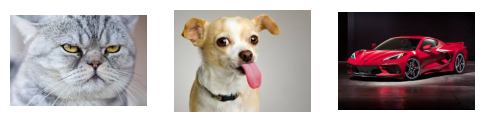

Sube una imagen para la clasificación:

<Recuerda que este modelo detecta gatos, perros y carros>



FileUpload(value=(), accept='image/*', description='Upload')

Image(value=b'')

In [25]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from PIL import Image
import io
from ultralytics import YOLO
import cv2
import numpy as np
import os

print("MODELO DE CLASIFICACION DE IMAGENES")
print("")

ruta_gatos = "dataset/gatos/gatoproyecto2.jpg"
ruta_perros = "dataset/perros/perroproyecto3.jpg"
ruta_carros = "dataset/carros/carroproyecto3.jpg"

imagen_gatos = Image.open(ruta_gatos)
imagen_perros = Image.open(ruta_perros)
imagen_carros = Image.open(ruta_carros)


fig, axes = plt.subplots(1, 3, figsize=(6, 3))  

axes[0].imshow(imagen_gatos)
axes[0].axis('off')
axes[1].imshow(imagen_perros)
axes[1].axis('off')
axes[2].imshow(imagen_carros)
axes[2].axis('off')

plt.show()

print("Sube una imagen para la clasificación:")
print("")
print("<Recuerda que este modelo detecta gatos, perros y carros>")
print("")

subir_imagen = widgets.FileUpload(accept='image/*', multiple=False)

imagen_widget = widgets.Image()

modelo = YOLO("yolov8n.pt")  

# Función para mostrar la imagen cargada y realizar la detección
def cargar_imagen(change):
    imagen_cargada = change['new']
    
    # Si no hay archivos, no hacer nada
    if len(imagen_cargada) == 0:
        return
    
    imagen = imagen_cargada[0]
    
    imagen_data = imagen['content']
    
    img1 = Image.open(io.BytesIO(imagen_data))
    
    img1.show()

    detectar_animales(imagen_data)

subir_imagen.observe(cargar_imagen, names='value')

display(subir_imagen, imagen_widget)


def detectar_animales(imagen_data):

    img1 = Image.open(io.BytesIO(imagen_data))
    img_cv = cv2.cvtColor(np.array(img1), cv2.COLOR_RGB2BGR) 

    resultados = modelo(img_cv) 

    detecto_perro = False
    detecto_gato = False
    detecto_carro = False


    for resultado in resultados:
        for box in resultado.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0]) 
            clase = int(box.cls[0])
            confianza = box.conf[0].item()

            nombre_clase = modelo.names[clase]

            # Definir color y marcar detecciones
            if nombre_clase == "dog":
                color = (0, 255, 0)  # Verde
                detecto_perro = True
            elif nombre_clase == "cat":
                color = (255, 0, 0)  # Azul
                detecto_gato = True
            elif nombre_clase == "car":
                color = (0, 0, 255)  # Rojo
                detecto_carro = True
            else:
                continue  # Si no es perro, gato o carro, ignorarlo

            cv2.rectangle(img_cv, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img_cv, f"{nombre_clase} ({confianza:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    if detecto_perro:
        print(f"✅ Se detectó un perro.")
    if detecto_gato:
        print(f"✅ Se detectó un gato.")
    if detecto_carro:
        print(f"✅ Se detectó un carro.")
    if not (detecto_perro or detecto_gato or detecto_carro):
        print(f"❌ No se detectó ni un perro, ni un gato, ni un carro.")

    # Convertir la imagen procesada a formato adecuado para el widget
    img_pil = Image.fromarray(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB
    byte_io = io.BytesIO()  # Crear un buffer en memoria
    img_pil.save(byte_io, format='PNG')  # Guardar la imagen en el buffer
    byte_io.seek(0)  # Volver al principio del buffer

    # Mostrar la imagen procesada en el widget
    imagen_widget.value = byte_io.read()